# Modeling Text Data

* Name:  Yaning Yu

You can find the data here: https://data.boston.gov/dataset/vision-zero-entry

# Task1 - Data Cleaning  [10 points]

Load the data, visualize the class distribution. Clean up the target labels. Some categories have been arbitrarily split and need to be consolidated. 

In [1]:
# Add your code for task 1 here. You may use multiple cells. 
import pandas as pd
import numpy as np
data = pd.read_csv('Vision_Zero_Entry.csv')
data.dtypes

﻿X             float64
Y              float64
OBJECTID         int64
GLOBALID       float64
REQUESTID      float64
REQUESTTYPE     object
REQUESTDATE     object
STATUS          object
STREETSEGID      int64
COMMENTS        object
USERTYPE        object
dtype: object

In [2]:
train = data[['REQUESTTYPE','COMMENTS']]
train.head()

,REQUESTTYPE,COMMENTS
0,bike facilities don't exist or need improvement,Broadway Bridge is wide & off highway ramps. V...
1,of something that is not listed here,This intersection is dangerous. Cars don't fol...
2,people don't yield while going straight,It's terrifying to walk over here. It seems li...
3,it’s hard to see / low visibility,cars coming around the corner of this wide one...
4,people don't yield while turning,"as you come off the bike path, it's unclear ho..."


In [3]:
label = train['REQUESTTYPE']
label.value_counts()

of something that is not listed here                                                                         1430
people speed                                                                                                 1231
bike facilities don't exist or need improvement                                                              1136
people run red lights / stop signs                                                                            792
people don't yield while turning                                                                              645
people double park their vehicles                                                                             631
it’s hard to see / low visibility                                                                             432
people don't yield while going straight                                                                       364
sidewalks/ramps don't exist or need improvement                                         

##### Manually Consolidating Categories

In [4]:
def pict6(value):
    res = ''
    if 'src="images/06' in value:
        res = True
    else:
        res = False
    return res
def pict2(value):
    res = ''
    if 'src="images/02' in value:
        res = True
    else:
        res = False
    return res
def pict10(value):
    res = ''
    if 'src="images/10' in value:
        res = True
    else:
        res = False
    return res
def pict11(value):
    res = ''
    if 'src="images/11' in value:
        res = True
    else:
        res = False
    return res
def pict1(value):
    res = ''
    if 'src="images/01' in value:
        res = True
    else:
        res = False
    return res
def pict12(value):
    res = ''
    if 'src="images/12' in value:
        res = True
    else:
        res = False
    return res
def pict14(value):
    res = ''
    if 'src="images/14' in value:
        res = True
    else:
        res = False
    return res
def waitfor(value):
    res = ''
    if 'the wait for the' in value:
        res = True
    else:
        res = False
    return res

In [5]:
label = label.replace("there are no bike facilities or they need maintenance","bike facilities don't exist or need improvement")
label = label.replace("the roadway surface needs maintenance","the roadway surface needs improvement")
label = label.replace(train[train['REQUESTTYPE'].apply(waitfor)]['REQUESTTYPE'],"the wait for the 'Walk' signal is too long")
label = label.replace("people are not given enough time to cross the street","there's not enough time to cross the street")
label = label.replace(train[train['REQUESTTYPE'].apply(pict6)]['REQUESTTYPE'],'people speed')
label = label.replace(train[train['REQUESTTYPE'].apply(pict14)]['REQUESTTYPE'],'of something that is not listed here')
label = label.replace(train[train['REQUESTTYPE'].apply(pict2)]['REQUESTTYPE'],"the wait for the 'Walk' signal is too long")
label = label.replace(train[train['REQUESTTYPE'].apply(pict10)]['REQUESTTYPE'],'it’s hard to see / low visibility')
label = label.replace(train[train['REQUESTTYPE'].apply(pict11)]['REQUESTTYPE'],"sidewalks/ramps don't exist or need improvement")
label = label.replace(train[train['REQUESTTYPE'].apply(pict1)]['REQUESTTYPE'],"there's not enough time to cross the street")
label = label.replace(train[train['REQUESTTYPE'].apply(pict12)]['REQUESTTYPE'],"the roadway surface needs improvement")
label = label.replace('people have to wait too long for the "Walk" signal',"the wait for the 'Walk' signal is too long")
label = label.replace("people have to cross too many lanes / too far","it's too far / too many lanes to cross")
label = label.replace("there are no sidewalks or they need maintenance","sidewalks/ramps don't exist or need improvement")
label = label.replace("it’s hard for people to see each other","it’s hard to see / low visibility")
label = label.replace("it's too far / too many lanes to cross","there's not enough time to cross the street")

In [6]:
label.value_counts()

of something that is not listed here               1433
bike facilities don't exist or need improvement    1279
people speed                                       1234
people run red lights / stop signs                  792
people don't yield while turning                    645
people double park their vehicles                   631
it’s hard to see / low visibility                   463
sidewalks/ramps don't exist or need improvement     372
people don't yield while going straight             364
there's not enough time to cross the street         358
the wait for the 'Walk' signal is too long          342
the roadway surface needs improvement               326
people cross away from the crosswalks               294
Name: REQUESTTYPE, dtype: int64

##### Remove duplicated data

In [7]:
## we can define duplicated record with the same REQUESTTYPE and COMMENTS
frames = [train['COMMENTS'], label]
train_con = pd.concat(frames,axis = 1)
train_con.head()

,COMMENTS,REQUESTTYPE
0,Broadway Bridge is wide & off highway ramps. V...,bike facilities don't exist or need improvement
1,This intersection is dangerous. Cars don't fol...,of something that is not listed here
2,It's terrifying to walk over here. It seems li...,people don't yield while going straight
3,cars coming around the corner of this wide one...,it’s hard to see / low visibility
4,"as you come off the bike path, it's unclear ho...",people don't yield while turning


In [8]:
train_con = train_con.drop_duplicates()
train_con.head()

,COMMENTS,REQUESTTYPE
0,Broadway Bridge is wide & off highway ramps. V...,bike facilities don't exist or need improvement
1,This intersection is dangerous. Cars don't fol...,of something that is not listed here
2,It's terrifying to walk over here. It seems li...,people don't yield while going straight
3,cars coming around the corner of this wide one...,it’s hard to see / low visibility
4,"as you come off the bike path, it's unclear ho...",people don't yield while turning


In [9]:
train_con = train_con[~train_con['COMMENTS'].isnull()]
len(train_con)

6456

##### visualize the class distribution

of something that is not listed here               1400
bike facilities don't exist or need improvement     817
people speed                                        741
people run red lights / stop signs                  649
people don't yield while turning                    452
people double park their vehicles                   420
it’s hard to see / low visibility                   411
sidewalks/ramps don't exist or need improvement     339
people don't yield while going straight             256
people cross away from the crosswalks               255
the roadway surface needs improvement               250
there's not enough time to cross the street         239
the wait for the 'Walk' signal is too long          227
Name: REQUESTTYPE, dtype: int64


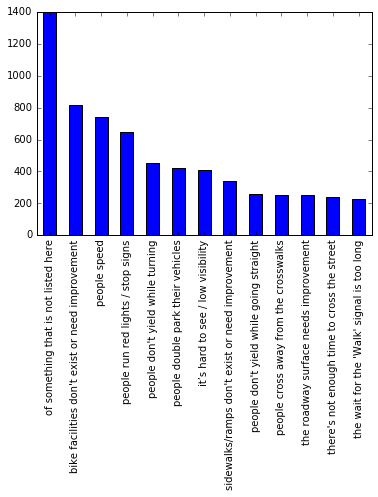

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
print train_con['REQUESTTYPE'].value_counts()
train_con['REQUESTTYPE'].value_counts().plot(kind='bar')

# Task2 - Model 1 [10 points]

Run a baseline multi-class classification model using a bag-of-word approach, report macro f1-score (should be above .5) and visualize the confusion matrix. Can you interpret the mistakes made by the model? 

##### firstly I will do labelEncoder for response variable

In [11]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train_con.loc[:,'REQUESTTYPE'] = number.fit_transform(train_con['REQUESTTYPE'])
train_con.head()


,COMMENTS,REQUESTTYPE
0,Broadway Bridge is wide & off highway ramps. V...,0
1,This intersection is dangerous. Cars don't fol...,2
2,It's terrifying to walk over here. It seems li...,4
3,cars coming around the corner of this wide one...,1
4,"as you come off the bike path, it's unclear ho...",5


In [12]:
class_name = number.inverse_transform([range(0,13)])
class_name = class_name.reshape(13,)
class_name[1] = 'it is hard to see / low visibility'
class_name

array(["bike facilities don't exist or need improvement",
       'it is hard to see / low visibility',
       'of something that is not listed here',
       'people cross away from the crosswalks',
       "people don't yield while going straight",
       "people don't yield while turning",
       'people double park their vehicles',
       'people run red lights / stop signs', 'people speed',
       "sidewalks/ramps don't exist or need improvement",
       'the roadway surface needs improvement',
       "the wait for the 'Walk' signal is too long",
       "there's not enough time to cross the street"], dtype=object)

##### Split Train and Test

In [13]:
from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(train_con['COMMENTS'],train_con['REQUESTTYPE'], random_state = 0, stratify=train_con['REQUESTTYPE'])

##### Pipeline of multi-class classification

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
# vect = CountVectorizer(stop_words = 'english')
# text_train = text_train.tolist()
# matrix_train = vect.fit_transform(text_train)
# matrix_test = vect.transform(text_test)
text_clf = Pipeline([('vect', CountVectorizer()),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
score = cross_val_score(text_clf,text_train, label_train,cv=5,scoring='f1_macro')
score = sum(score)/5
#print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")
print 'macro f1 score is ',score

macro f1 score is  0.542363741948


In [15]:
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear',random_state=0))
#text_pred = classifier.fit(matrix_train, label_train).predict(matrix_test)
#print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

##### Visulization on confusion matrix

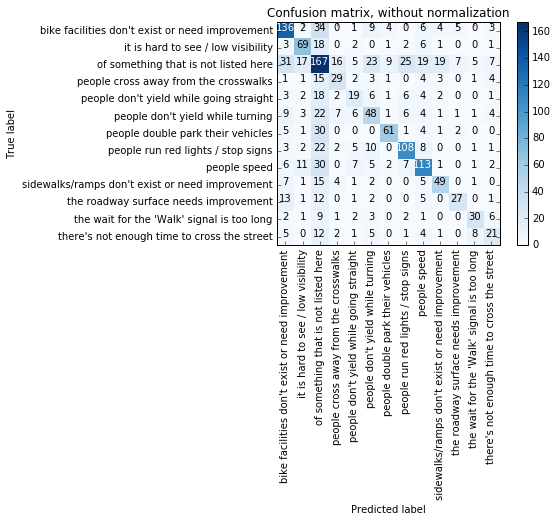

In [16]:
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
class_names = class_name
#class_names = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, text_pred)
np.set_printoptions(precision=2)
plt.figure()
#plt.fig.subplots_adjust()

plot_confusion_matrix(cnf_matrix,classes = class_names,
                      title='Confusion matrix, without normalization')

#### Interpretation of mistake by the model
I think the `of something that is not listed here` are missing values here, according to confusion matrix above, most mistakes happen here, which has most both 'false positive' and 'false nagetive'. I guess that this class belongs to other 12 classes, so if we can do clustering on clustering, along with other classes, the accuracy may be better in our prediction model. Also, we just use bag-of-words data representation here, which is not semantically meaningful, not consider previous and later words, either. 

# Task3 - Model 2 [30 points]

Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

##### Using tf-idf data representation

In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
my_stopwords = set(ENGLISH_STOP_WORDS)
my_stopwords.remove("well")
my_stopwords.remove("not")
my_stopwords.add("ve")
text_clf = Pipeline([('vect', TfidfVectorizer(ngram_range = (1,2),min_df=4,stop_words = my_stopwords)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.534547450384


##### Using bi-gram combined with unigram data representation

In [18]:
from sklearn.preprocessing import Normalizer
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,2),min_df=2)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")
## from the result below, it's better than basic bag-of-word

macro f1 score is  0.565348828832


##### Using combination of unigram and bi-gram with tf-idf data representation

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,2),min_df=2)),('vect1',TfidfTransformer()),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.531082360166


##### Using tri-gram data representation

In [20]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,3),min_df=2)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.561652782094


##### Using four-gram data representation

In [21]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,4),stop_words = my_stopwords ,min_df=2)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.553643843425


##### Using character five-gram

In [22]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,5),min_df=2,analyzer="char_wb")),('clf', LogisticRegression(C = 10,multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.524001173367


##### Using hashing vectorizer

In [23]:
from sklearn.feature_extraction.text import HashingVectorizer
text_clf = Pipeline([('vect', HashingVectorizer()),('clf', LogisticRegression(C = 10,multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.5373019427


##### Using grid search to see which data representation method is best here.

In [24]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import make_pipeline
# param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.001],
#               "countvectorizer__ngram_range": [(1, 1), (1, 2), (1,4),(1, 7),
#                                                (2, 3), (2, 5), (3, 8), (5, 5)],
#               "countvectorizer__min_df": [1, 2, 3, 4, 5],
#               "countvectorizer__analyzer":["char_wb","word"],
#               "countvectorizer__stop_words":["english",my_stopwords,None],
#               "normalizer": [None, Normalizer()]
#              }
# grid = GridSearchCV(make_pipeline(CountVectorizer(analyzer="char"), Normalizer(), LogisticRegression()),
#                     param_grid=param_grid, cv=5, scoring="f1_macro")
# grid.fit(text_train, label_train)

In [25]:
#grid.best_score_

In [26]:
#grid.best_params_

# Task4 - Visualize Results [10 points]

Visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

In [27]:
## fron task 3, I found the best data representation is bi-gram that combined with unigram and 
## bigram, and the best classification function is logistic regression.
from sklearn.preprocessing import Normalizer
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,2),min_df=2)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.565348828832


##### Visulize confusion matrix

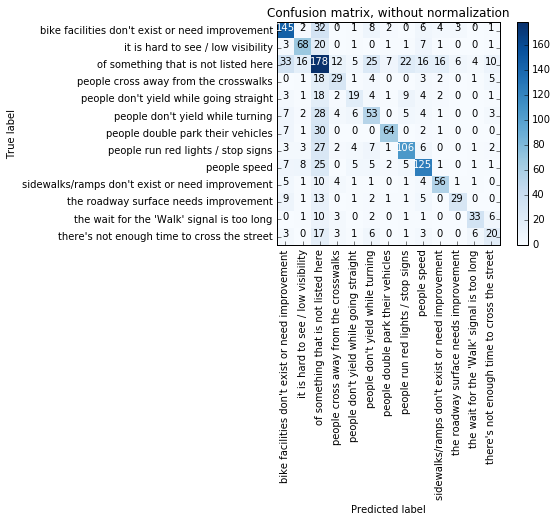

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, text_pred)
np.set_printoptions(precision=2)
plt.figure()
#plt.fig.subplots_adjust()

plot_confusion_matrix(cnf_matrix,classes = class_names,
                      title='Confusion matrix, without normalization')
##from the confusion matrix below, it is much more better than standard unigram

##### Visulize important features

In [29]:
vect = CountVectorizer(ngram_range = (1,2),min_df=2)
text_train_list = text_train.tolist()
matrix_train = vect.fit_transform(text_train_list)
matrix_test = vect.transform(text_test)
feature_names = vect.get_feature_names()
lr = LogisticRegression(multi_class = 'multinomial',solver = "lbfgs").fit(matrix_train, label_train)

In [30]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, f=0):
    title = class_names[f]
    #if ax is None:
    ax = plt.gca()
    c = "feature importance for "
    title = class_names[f]
    plt.title(c+title)
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    ax.bar(myrange, coef[important])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=60, ha="right")

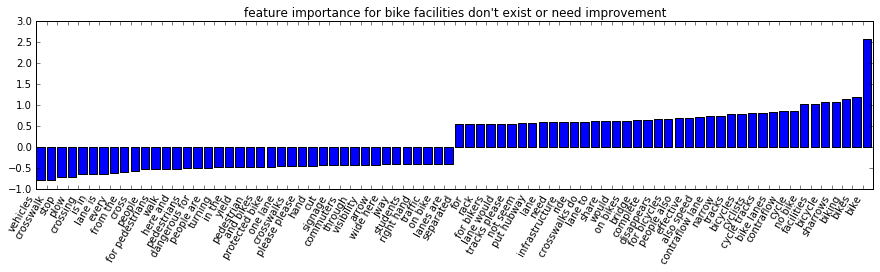

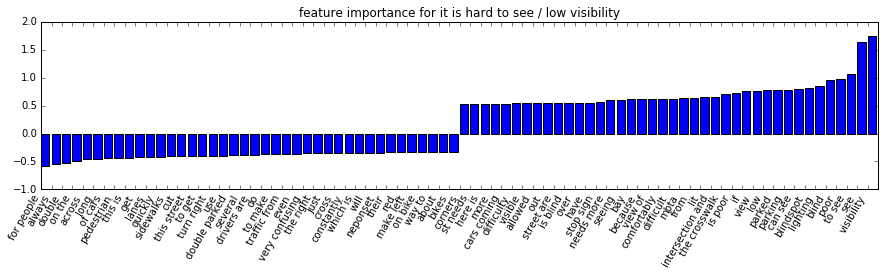

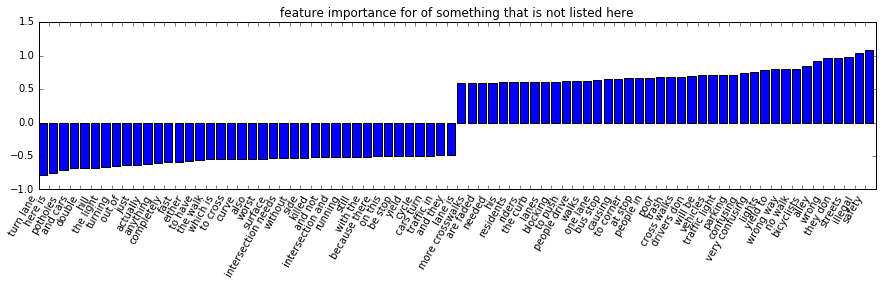

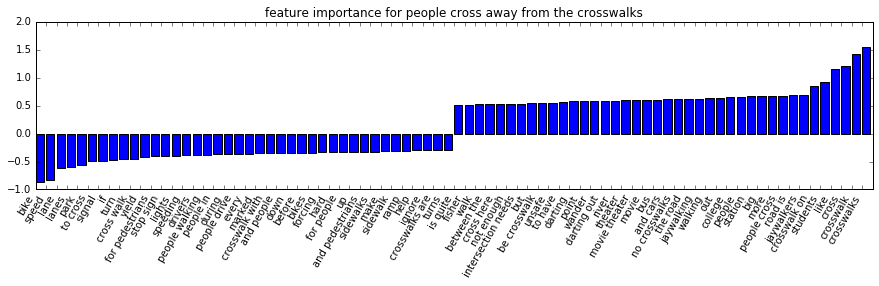

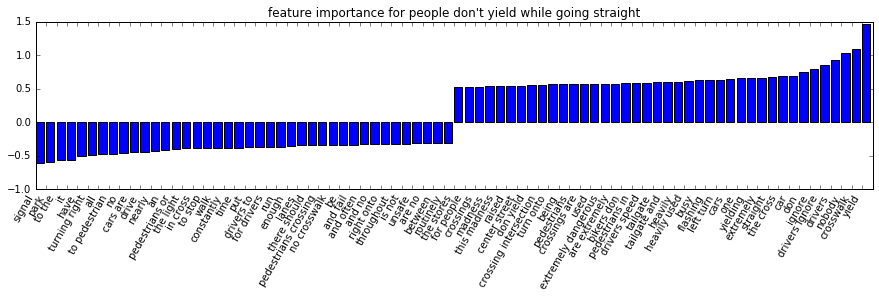

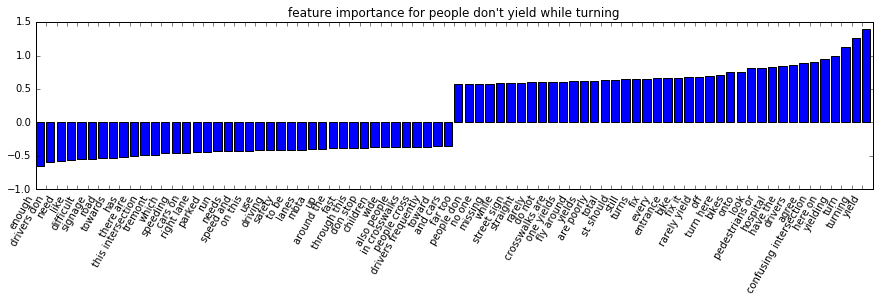

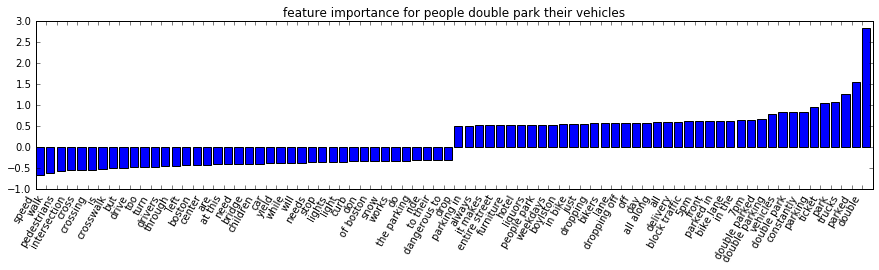

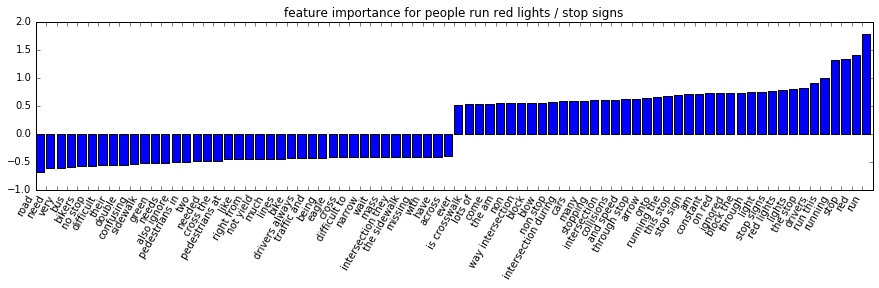

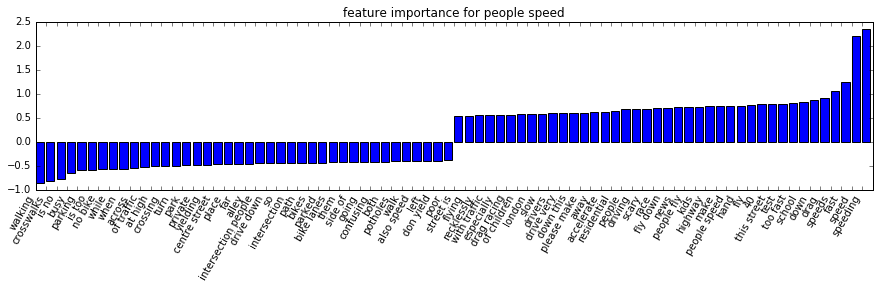

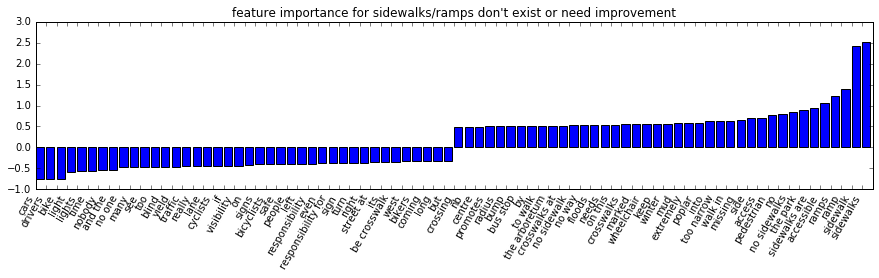

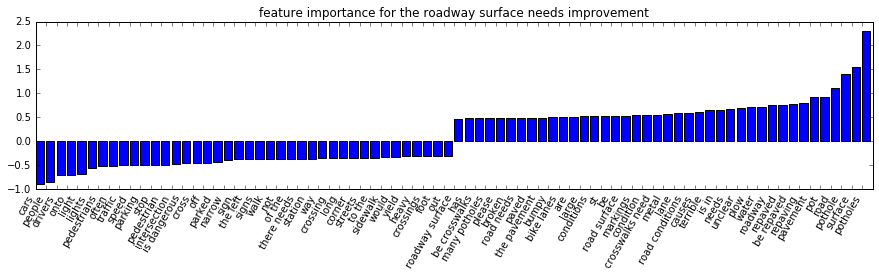

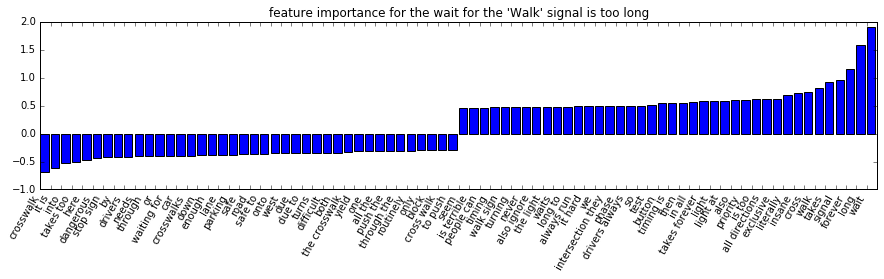

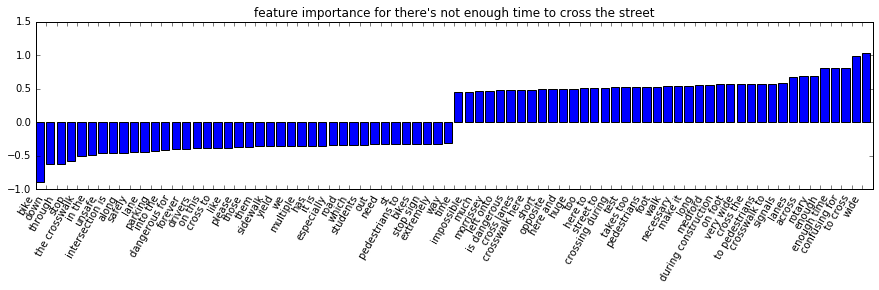

In [31]:
##in our dataset, we have 13 categories, so for feature importance, we will have  13 feature important graph
for i in xrange(0,13):
    plt.figure(figsize=(15, 3))
    plot_important_features(lr.coef_[i], np.array(feature_names), top_n=40, f = i)

##### Visualize some mistake results

In [32]:
d = {'COMMENTS': pd.Series(train_con['COMMENTS'][label_test.index].tolist()),
    'MISTAKE PREDICT':pd.Series(number.inverse_transform(text_pred)),
   'TRUE TYPR': pd.Series(number.inverse_transform(train_con['REQUESTTYPE'][label_test.index]))}
mistake_view = pd.DataFrame(d)
mistake_view['compare'] = mistake_view['MISTAKE PREDICT'] == mistake_view['TRUE TYPR']
mistake_view = mistake_view[mistake_view['compare']==False]
mistake_view=mistake_view.drop('compare',axis = 1)

In [33]:
mistake_view

,COMMENTS,MISTAKE PREDICT,TRUE TYPR
0,Have to push the beg button to get the walk si...,there's not enough time to cross the street,the wait for the 'Walk' signal is too long
1,Frequently have to merge with cars to circumve...,of something that is not listed here,people double park their vehicles
5,Because there's no time when pedestrians can c...,people cross away from the crosswalks,people don't yield while turning
6,Guest street pedestrian and vehicular traffic ...,people run red lights / stop signs,people don't yield while turning
8,Cars fail to stop on a regular basis. I walk ...,of something that is not listed here,people run red lights / stop signs
9,"There is no ""no turn on red"" sign at this inte...",there's not enough time to cross the street,of something that is not listed here
10,In front of CVS. 10 years in this neighborhood...,of something that is not listed here,people double park their vehicles
13,This one block of Marlborough makes the whole ...,of something that is not listed here,bike facilities don't exist or need improvement
18,This is a really tight street. Cars run over t...,people speed,the roadway surface needs improvement
22,I wait about two to three minutes at the corne...,of something that is not listed here,the wait for the 'Walk' signal is too long


In [34]:
mistake_view['MISTAKE PREDICT'].value_counts()

of something that is not listed here               248
bike facilities don't exist or need improvement     80
people don't yield while turning                    64
people speed                                        61
people run red lights / stop signs                  46
it’s hard to see / low visibility                   37
there's not enough time to cross the street         30
people cross away from the crosswalks               30
sidewalks/ramps don't exist or need improvement     28
people don't yield while going straight             26
people double park their vehicles                   15
the wait for the 'Walk' signal is too long          14
the roadway surface needs improvement               10
Name: MISTAKE PREDICT, dtype: int64

bike facilities don't exist or need improvement    32
people double park their vehicles                  30
people don't yield while turning                   28
people run red lights / stop signs                 27
people speed                                       25
it’s hard to see / low visibility                  20
people don't yield while going straight            18
people cross away from the crosswalks              18
there's not enough time to cross the street        17
the roadway surface needs improvement              13
sidewalks/ramps don't exist or need improvement    10
the wait for the 'Walk' signal is too long         10
Name: TRUE TYPR, dtype: int64


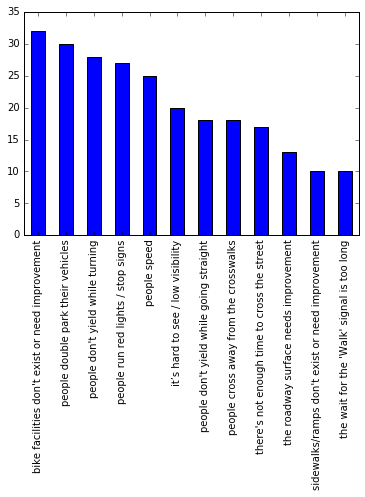

In [35]:
## we can see that mistake in 'of something that is not listed here' is the most one, in this case,
## I want to do a visulization on this category alone
%matplotlib inline
#print train_con['REQUESTTYPE'].value_counts()
print mistake_view['TRUE TYPR'][mistake_view['MISTAKE PREDICT']=='of something that is not listed here'].value_counts()
mistake_view['TRUE TYPR'][mistake_view['MISTAKE PREDICT']=='of something that is not listed here'].value_counts().plot(kind='bar')

# Task5 - Clustering [10 points]

Apply LDA, NMF and K-Means to the whole dataset. Can you find clusters or topics that match well with some of the ground truth labels? Use ARI to compare the methods and visualize topics and clusters.

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [187]:
##In this case, I wouldn't aggregate all the same column that should be the same category here.
##However, for column like '', I still need to aggregate them. Also, remove null rows and duplicated rows
train = data[['REQUESTTYPE','COMMENTS']]
label = train['REQUESTTYPE']

In [188]:
label = label.replace("there are no bike facilities or they need maintenance","bike facilities don't exist or need improvement")
label = label.replace("the roadway surface needs maintenance","the roadway surface needs improvement")
label = label.replace(train[train['REQUESTTYPE'].apply(waitfor)]['REQUESTTYPE'],"the wait for the 'Walk' signal is too long")
label = label.replace("people are not given enough time to cross the street","there's not enough time to cross the street")
label = label.replace(train[train['REQUESTTYPE'].apply(pict6)]['REQUESTTYPE'],'people speed')
label = label.replace(train[train['REQUESTTYPE'].apply(pict14)]['REQUESTTYPE'],'of something that is not listed here')
label = label.replace(train[train['REQUESTTYPE'].apply(pict2)]['REQUESTTYPE'],"the wait for the 'Walk' signal is too long")
label = label.replace(train[train['REQUESTTYPE'].apply(pict10)]['REQUESTTYPE'],'it’s hard to see / low visibility')
label = label.replace(train[train['REQUESTTYPE'].apply(pict11)]['REQUESTTYPE'],"sidewalks/ramps don't exist or need improvement")
label = label.replace(train[train['REQUESTTYPE'].apply(pict1)]['REQUESTTYPE'],"there's not enough time to cross the street")
label = label.replace(train[train['REQUESTTYPE'].apply(pict12)]['REQUESTTYPE'],"the roadway surface needs improvement")
label = label.replace('people have to wait too long for the "Walk" signal',"the wait for the 'Walk' signal is too long")
label = label.replace("people have to cross too many lanes / too far","it's too far / too many lanes to cross")
label = label.replace("there are no sidewalks or they need maintenance","sidewalks/ramps don't exist or need improvement")
label = label.replace("it’s hard for people to see each other","it’s hard to see / low visibility")
label = label.replace("it's too far / too many lanes to cross","there's not enough time to cross the street")
frame = [train['COMMENTS'], label]
train_data = pd.concat(frame,axis = 1)
train_data = train_data[~train_data['COMMENTS'].isnull()]
train_data = train_data.drop_duplicates()
train_for_text = train_data['COMMENTS']
train_for_label = train_data['REQUESTTYPE']

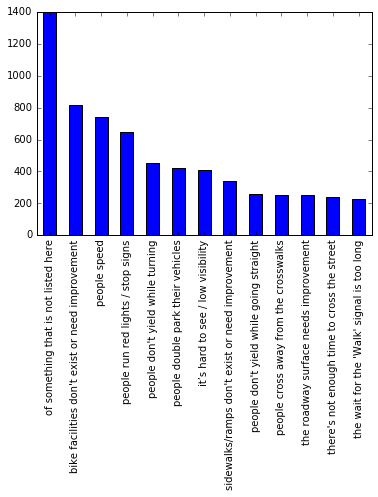

In [189]:
train_data['REQUESTTYPE'].value_counts().plot(kind='bar')

In [190]:
text_train,text_test,label_train,label_test = train_test_split(train_data['COMMENTS'],train_data['REQUESTTYPE'], random_state = 0, stratify=train_data['REQUESTTYPE'])

In [191]:
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
import string
import nltk
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [192]:
vect = TfidfVectorizer(ngram_range = (1,2),min_df=2,stop_words='english')
text_train_list = text_train.tolist()
matrix_train = vect.fit_transform(text_train_list)
matrix_test = vect.transform(text_test)
feature_names = vect.get_feature_names()

In [223]:
from sklearn.preprocessing import MaxAbsScaler, Normalizer
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(matrix_train)

In [290]:
label_encoder = number.transform(label_train)
label_encoder_test = number.transform(label_test)

##### NMF

In [245]:
##according to previous feature importance, I thing there should be 12 classes in total
from sklearn.decomposition import NMF
nmf_scale = NMF(n_components=12, verbose=10, tol=0.01)
nmf_scale.fit(X_scaled)
#nmf = NMF(n_components=12, verbose=10, tol=0.01)
#nmf.fit(matrix_train)

violation: 1.0
violation: 0.514703923188
violation: 0.304117926135
violation: 0.156446936151
violation: 0.0839023178649
violation: 0.0492972733661
violation: 0.0326144712726
violation: 0.0239238367817
violation: 0.0193137013416
violation: 0.016705650467
violation: 0.0149993793326
violation: 0.0138156475996
violation: 0.0128527894499
violation: 0.012001794556
violation: 0.0112374728056
violation: 0.0103044179102
violation: 0.00943581165052
Converged at iteration 17


NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=12, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.01, verbose=10)

In [284]:
X_scaled.shape

(4842, 9262)

In [247]:
X_nmf = nmf_scale.transform(X_scaled)

violation: 1.0
violation: 0.186410221824
violation: 0.00470069145828
Converged at iteration 3


In [282]:
X_nmf.shape

(4842, 12)

In [249]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

In [250]:
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

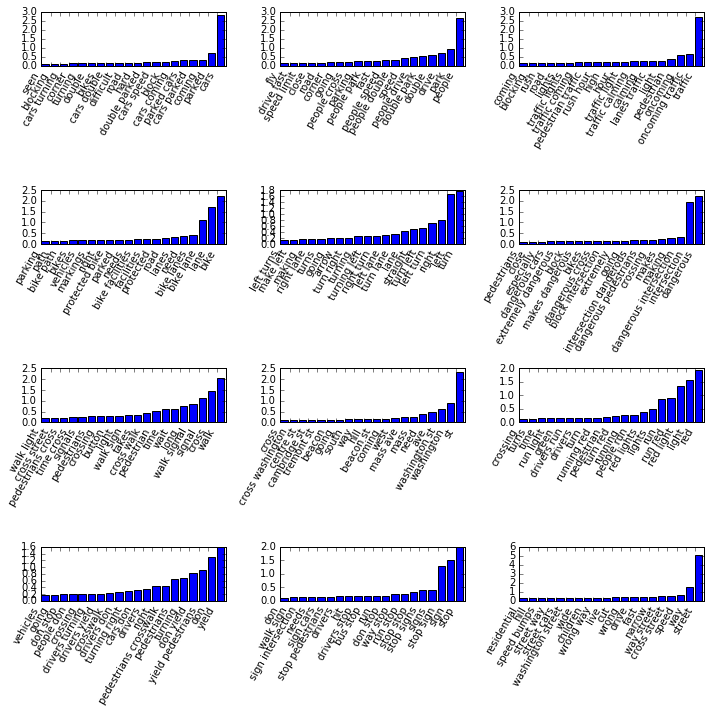

In [254]:
large_comp_inds = np.argsort(X_nmf.mean(axis=0))[-12:][::-1]
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), nmf_scale.components_[large_comp_inds, :]):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)  
plt.tight_layout()

In [242]:
# sorting = np.argsort(nmf_scale.components_, axis=1)[:, ::-1]
# print_topics(large_comp_inds, feature_names, sorting)

From the NMF, I set 12 clustering here. In general, there are 12 topics related to the labels in original dataset. From the visulization and topic keywords above, we can see from the result, the sixth one is obviously related to yield, the first one is obviously related by double park, and the twelfth one is obviously related to walk signal.

##### LDA

In [256]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=8, learning_method="batch")
X_lda = lda.fit_transform(matrix_train)

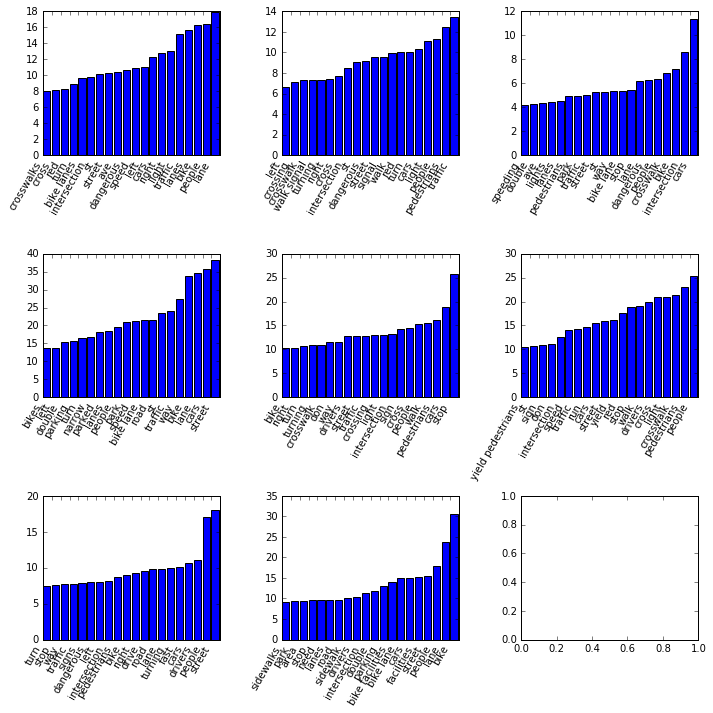

In [260]:
feature_names = np.array(vect.get_feature_names())
n_components = 12
fig, axes = plt.subplots(n_components // 3-1  , 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

From above LDA, there are several topics related to the ground true label in original dataset. 
From the keywords from each category, we can see that they are meanful in ground true label

In [262]:
df = pd.DataFrame(X_lda, columns=['topic%d'%i for i in range(1,9)])
df['TRUETYPE'] = pd.Series(label_train.tolist())

In [266]:
maxone = np.argmax(X_lda, axis=1)
maxone = maxone+1

In [273]:
df1 = pd.DataFrame(maxone, columns=['max probability topic'])
df1['TRUETYPE'] = pd.Series(label_train.tolist())
df1.head()

,max probability topic,TRUETYPE
0,1,bike facilities don't exist or need improvement
1,5,bike facilities don't exist or need improvement
2,4,of something that is not listed here
3,5,of something that is not listed here
4,4,the wait for the 'Walk' signal is too long


In [268]:
df1_pivot = df1.pivot_table(index='TRUETYPE',columns='max probability topic',values=df1.index,aggfunc=lambda x: len(x))

max probability topic,1,2,3,4,5,6,7,8
TRUETYPE,,,,,,,,
bike facilities don't exist or need improvement,70,41,36,193,60,41,49,123
it’s hard to see / low visibility,22,38,23,61,39,48,34,43
of something that is not listed here,122,111,66,276,150,120,93,112
people cross away from the crosswalks,34,16,19,38,26,35,13,10
people don't yield while going straight,20,14,9,28,42,50,11,18
people don't yield while turning,32,44,8,45,57,61,49,43
people double park their vehicles,41,15,36,99,17,5,27,75
people run red lights / stop signs,64,57,25,57,85,116,52,31
people speed,63,41,29,148,54,84,71,66


From above LDA result, there are almost even number of true labels in each topic. I have tried different topic numbers here. 

In [59]:
##according to compute ARI, we need to redefine label here. for each true label, we pick largest
## counts of each topic

##### KMeans

In [300]:
#### maybe we can find that some labels are very similiar, so I choose 7 clusstering here
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7)
km.fit(matrix_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [301]:
df2 = pd.DataFrame(km.labels_, columns=['clustering'])
df2['TRUETYPE'] = pd.Series(label_train.tolist())

In [302]:
df2_pivot = df2.pivot_table(index='TRUETYPE',columns='clustering',values=df2.index,aggfunc=lambda x: len(x))
df2_pivot

clustering,0,1,2,3,4,5,6
TRUETYPE,,,,,,,
bike facilities don't exist or need improvement,201.0,1.0,5.0,2.0,180.0,221.0,3.0
it’s hard to see / low visibility,4.0,13.0,5.0,30.0,7.0,245.0,4.0
of something that is not listed here,29.0,32.0,62.0,52.0,113.0,685.0,77.0
people cross away from the crosswalks,NaN,11.0,5.0,5.0,NaN,133.0,37.0
people don't yield while going straight,2.0,85.0,1.0,22.0,8.0,65.0,9.0
people don't yield while turning,6.0,86.0,28.0,16.0,29.0,135.0,39.0
people double park their vehicles,16.0,NaN,1.0,3.0,74.0,220.0,1.0
people run red lights / stop signs,1.0,11.0,214.0,132.0,6.0,100.0,23.0
people speed,8.0,24.0,14.0,42.0,10.0,445.0,13.0


In [294]:
test_data = pd.DataFrame(text_test)
test_data['TRUELABEL'] = label_test
test_data['ENCODERLABEL'] = label_encoder_test

In [295]:
test_data.head()

,COMMENTS,TRUELABEL,ENCODERLABEL
7934,Have to push the beg button to get the walk si...,the wait for the 'Walk' signal is too long,11
4875,Frequently have to merge with cars to circumve...,people double park their vehicles,6
5395,Very dangerous rotary. Try to avoid at all cos...,of something that is not listed here,2
721,There are too many space savers. This makes it...,of something that is not listed here,2
3143,People jaywalk against the signals here all th...,of something that is not listed here,2


In [277]:
### it seems like Kmeans clustering has better result here. In each cluster, there are apparently
###large counts here.

# Task6 - Model 3 [30 points]

Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model. Re-assign labels using either the results of clustering or using keywords that you found during data exploration. The labels must be semantically meaningful.
The data has a large “other” category. Apply the topic modeling and clustering techniques to this subset of the data to find possible splits of this class.
Report accuracy using macro average f1 score (should be above .53) 


##### Redefine the labels

In [465]:
## fistly, we need to do clustering for whole dataset to re-define the label
vect = TfidfVectorizer(ngram_range = (1,2),min_df=2,stop_words='english')
vect.fit(train_data['COMMENTS'])
train_matrix_whole = vect.transform(train_data['COMMENTS'])

##### KMeans

In [477]:
km1 = KMeans(n_clusters=8)
km1.fit(train_matrix_whole)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [478]:
df3 = pd.DataFrame(km1.labels_, columns=['clustering'])
df3['TRUETYPE'] = pd.Series(train_data['REQUESTTYPE'].tolist())
df3_pivot = df3.pivot_table(index='TRUETYPE',columns='clustering',values=df3.index,aggfunc=lambda x: len(x))
df3['COMMENT'] = pd.Series(train_data['COMMENTS'].tolist())
df3['REDEFINE_LABEL'] = pd.Series(train_data['REQUESTTYPE'].tolist())

In [479]:
df3

,clustering,TRUETYPE,COMMENT,REDEFINE_LABEL
0,2,bike facilities don't exist or need improvement,Broadway Bridge is wide & off highway ramps. V...,bike facilities don't exist or need improvement
1,1,of something that is not listed here,This intersection is dangerous. Cars don't fol...,of something that is not listed here
2,3,people don't yield while going straight,It's terrifying to walk over here. It seems li...,people don't yield while going straight
3,4,it’s hard to see / low visibility,cars coming around the corner of this wide one...,it’s hard to see / low visibility
4,1,people don't yield while turning,"as you come off the bike path, it's unclear ho...",people don't yield while turning
5,0,of something that is not listed here,This intersection is very confusing.,of something that is not listed here
6,6,the wait for the 'Walk' signal is too long,people walking go against the light because we...,the wait for the 'Walk' signal is too long
7,0,the wait for the 'Walk' signal is too long,Getting from the T stop to the pedestrian brid...,the wait for the 'Walk' signal is too long
8,1,people don't yield while turning,I will be coming down to the intersection alon...,people don't yield while turning
9,0,sidewalks/ramps don't exist or need improvement,"This is a crosswalk by a school, and there is ...",sidewalks/ramps don't exist or need improvement


In [480]:
##just use clustering result
df_re = pd.DataFrame(df3['COMMENT'])
df_re['clustering']= df3['clustering'].astype('str')
df_re

,COMMENT,clustering
0,Broadway Bridge is wide & off highway ramps. V...,2
1,This intersection is dangerous. Cars don't fol...,1
2,It's terrifying to walk over here. It seems li...,3
3,cars coming around the corner of this wide one...,4
4,"as you come off the bike path, it's unclear ho...",1
5,This intersection is very confusing.,0
6,people walking go against the light because we...,6
7,Getting from the T stop to the pedestrian brid...,0
8,I will be coming down to the intersection alon...,1
9,"This is a crosswalk by a school, and there is ...",0


In [481]:
text_train,text_test,label_train,label_test = train_test_split(df_re['COMMENT'],df_re['clustering'], random_state = 0, stratify=df_re['clustering'])

In [482]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,2),min_df=2)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.901634300003


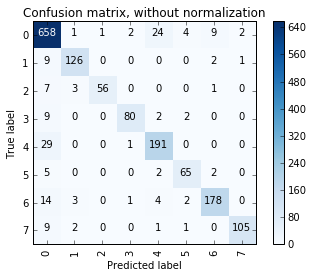

In [483]:
cnf_matrix = confusion_matrix(label_test, text_pred)
np.set_printoptions(precision=2)
plt.figure()
#plt.fig.subplots_adjust()

plot_confusion_matrix(cnf_matrix,classes = range(0,8),
                      title='Confusion matrix, without normalization')

##### Use clustering result to aggregate labels

In [496]:
# df3.head()

,clustering,TRUETYPE,COMMENT,REDEFINE_LABEL
0,2,bike facilities don't exist or need improvement,Broadway Bridge is wide & off highway ramps. V...,"[0, 1, 3, 4, 7]"
1,1,of something that is not listed here,This intersection is dangerous. Cars don't fol...,1
2,3,people don't yield while going straight,It's terrifying to walk over here. It seems li...,"[0, 5]"
3,4,it’s hard to see / low visibility,cars coming around the corner of this wide one...,"[0, 1, 3, 4]"
4,1,people don't yield while turning,"as you come off the bike path, it's unclear ho...","[0, 5]"


In [497]:
# df3_pivot

clustering,0,1,2,3,4,5,6,7
TRUETYPE,,,,,,,,
bike facilities don't exist or need improvement,293.0,45.0,195.0,3.0,44.0,1.0,8.0,228.0
it’s hard to see / low visibility,257.0,48.0,1.0,36.0,52.0,6.0,7.0,4.0
of something that is not listed here,663.0,227.0,20.0,61.0,200.0,29.0,140.0,60.0
people cross away from the crosswalks,167.0,4.0,NaN,5.0,31.0,4.0,43.0,1.0
people don't yield while going straight,100.0,11.0,1.0,22.0,18.0,92.0,6.0,6.0
people don't yield while turning,117.0,97.0,1.0,20.0,18.0,108.0,61.0,30.0
people double park their vehicles,266.0,11.0,19.0,3.0,24.0,NaN,2.0,95.0
people run red lights / stop signs,124.0,62.0,NaN,176.0,17.0,15.0,254.0,1.0
people speed,248.0,17.0,9.0,39.0,367.0,26.0,22.0,13.0


In [498]:
# def re_define_label(value):
#     if value == "bike facilities don't exist or need improvement":
#         value = [0,1,3,4,7]
#     if value == "people don't yield while turning":
#         value = [0,5]
#     if value == 'it’s hard to see / low visibility':
#         value = [0,1,3,4]
#     #if value == 'of something that is not listed here':
#         #value = df3['clustering']
#     if value == 'people cross away from the crosswalks':
#         value = [0,4,6]
#     if value == "people don't yield while going straight":
#         value = [0,5]
#     if value == 'people double park their vehicles':
#         value = [0,7]
#     if value == 'people run red lights / stop signs':
#         value = [0,1,3,6]
#     if value == 'people speed':
#         value = [0,2,3]
#     if value == "sidewalks/ramps don't exist or need improvement":
#         value = [0,4]
#     if value == 'the roadway surface needs improvement':
#         value= [0,4,7]
#     if value == "the wait for the 'Walk' signal is too long":
#         value = [0,6]
#     if value == "there's not enough time to cross the street":
#         value = [0,4,6]
#     return value

# df3['REDEFINE_LABEL'] = df3['REDEFINE_LABEL'].apply(re_define_label)       

In [499]:
# df3.loc[df3.REDEFINE_LABEL == 'of something that is not listed here', 'REDEFINE_LABEL'] = pd.Series([df3.loc[df3.REDEFINE_LABEL == 'of something that is not listed here', 'clustering']])

In [506]:
# df3.loc[df3.REDEFINE_LABEL == 'of something that is not listed here', 'clustering'].tolist()

In [505]:
# newdata = pd.DataFrame(df3['COMMENT'])
# newdata['LABEL'] = df3['REDEFINE_LABEL']


COMMENT    object
LABEL      object
dtype: object

In [507]:
# from sklearn.preprocessing import MultiLabelBinarizer
# MultiLabelBinarizer().fit_transform(newdata['LABEL'])

In [419]:
text_train,text_test,label_train,label_test = train_test_split(newdata['COMMENT'],newdata['LABEL'], random_state = 0, stratify=newdata['LABEL'])

In [420]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,2),min_df=2)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.394786701712


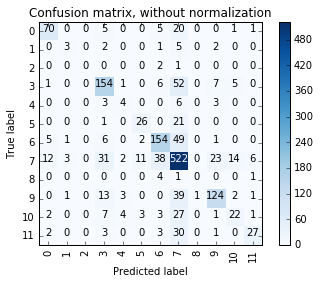

In [401]:
cnf_matrix = confusion_matrix(label_test, text_pred)
np.set_printoptions(precision=2)
plt.figure()
#plt.fig.subplots_adjust()

plot_confusion_matrix(cnf_matrix,classes = range(0,12),
                      title='Confusion matrix, without normalization')

##### LDA

In [461]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=3, learning_method="batch")
X_lda = lda.fit_transform(train_matrix_whole)
maxone = np.argmax(X_lda, axis=1)

In [462]:
df1 = pd.DataFrame(maxone, columns=['max probability topic'])
df1['COMMENTS'] = pd.Series(train_data['COMMENTS'].tolist())
text_train,text_test,label_train,label_test = train_test_split(df1['COMMENTS'],df1['max probability topic'], random_state = 0, stratify=df1['max probability topic'])

In [463]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1,2),min_df=2)),('clf', LogisticRegression(multi_class = 'multinomial',solver = "lbfgs"))])
text_pred = text_clf.fit(text_train, label_train).predict(text_test)
print 'macro f1 score is ',f1_score(label_test, text_pred, average="macro")

macro f1 score is  0.71646961015


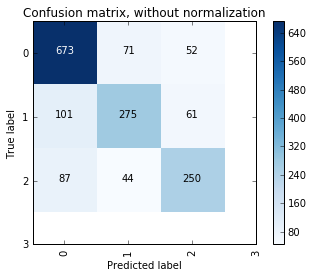

In [464]:
cnf_matrix = confusion_matrix(label_test, text_pred)
np.set_printoptions(precision=2)
plt.figure()
#plt.fig.subplots_adjust()

plot_confusion_matrix(cnf_matrix,classes = range(0,4),
                      title='Confusion matrix, without normalization')

# Extra Credit [Up to +20 points]

Use a word embedding representation like word2vec for step 3 and or step 6. 

In [ ]:
# Add your code for extra credit here. You may use multiple cells. 

